In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [6]:
df = pd.read_csv("acc_data_after_cleaning.csv",engine='python')


In [7]:
df.columns

Index(['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_location-restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       '1st_point_of_impact', 'was_vehicle_left_hand_drive?',
       'journey_purpose_of_driver', 'sex_of_driver', 'age_of_driver',
       'age_band_of_driver', 'engine_capacity_(cc)', 'propulsion_code',
       'age_of_vehicle', 'driver_home_area_type',
       'NUmber_of_Casualities_unique_to_accident_index',
       'No_of_Vehicles_involved_unique_to_accident_index', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'day_of_week', 'time',
       'local_authority_(district)', 'local_authority_(highway)',
       '1st_road_class', '1st_road_number', 'road_type', 'speed_limit',
       'junction_detail', 'junction_control', '2nd_road_class',
       '2nd_road

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186050 entries, 0 to 186049
Data columns (total 62 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   vehicle_type                                      186050 non-null  int64  
 1   towing_and_articulation                           186050 non-null  int64  
 2   vehicle_manoeuvre                                 186050 non-null  int64  
 3   vehicle_location-restricted_lane                  186050 non-null  int64  
 4   junction_location                                 186050 non-null  int64  
 5   skidding_and_overturning                          186050 non-null  int64  
 6   hit_object_in_carriageway                         186050 non-null  int64  
 7   vehicle_leaving_carriageway                       186050 non-null  int64  
 8   hit_object_off_carriageway                        186050 non-null  int64  
 9   1st_

In [11]:
data_cat=df.select_dtypes(include=[object])

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
data_cat.columns

Index(['time', 'local_authority_(highway)'], dtype='object')

In [ ]:
data_cat = data_cat.apply(le.fit_transform)

In [ ]:
data_cat.describe()

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,140056.000000,140056.000000,140056.000000,140056.000000,140056.000000
mean,70027.500000,181.423923,839.522284,106.023405,15175.466078
std,40430.828988,104.640210,304.856216,48.356238,8990.604956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35013.750000,91.000000,609.000000,73.000000,7222.000000
50%,70027.500000,180.000000,880.000000,118.000000,15367.000000
75%,105041.250000,272.000000,1064.000000,140.000000,23289.000000
max,140055.000000,364.000000,1439.000000,206.000000,28737.000000


In [16]:
data_cat= data_cat.astype('category')

In [19]:
data_cat.describe()

,time,local_authority_(highway)
count,186050,186050
unique,1439,207
top,1899-12-30 17:00:00,E10000016
freq,1711,5799


In [21]:
data_num = data_num.astype('int')

NameError: name 'data_num' is not defined

In [ ]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140029 entries, 0 to 140055
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype
---  ------                                       --------------   -----
 0   Location_Easting_OSGR                        140029 non-null  int64
 1   Location_Northing_OSGR                       140029 non-null  int64
 2   Longitude                                    140029 non-null  int64
 3   Latitude                                     140029 non-null  int64
 4   Police_Force                                 140029 non-null  int64
 5   Accident_Severity                            140029 non-null  int64
 6   Number_of_Vehicles                           140029 non-null  int64
 7   Number_of_Casualties                         140029 non-null  int64
 8   Day_of_Week                                  140029 non-null  int64
 9   Local_Authority_(District)                   140029 non-null  int64
 10  1st_Road

In [ ]:
data_cat.describe()

,Accident_Index,Date,Time,Local_Authority_(Highway),LSOA_of_Accident_Location
count,140056,140056,140056,140056,140056
unique,140056,365,1440,207,28738
top,0,58,1019,136,28737
freq,1,535,1347,4222,8897


In [ ]:
data_final=pd.concat([data_num,data_cat],axis=1)

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140056 entries, 0 to 134207
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Location_Easting_OSGR                        140029 non-null  float64 
 1   Location_Northing_OSGR                       140029 non-null  float64 
 2   Longitude                                    140029 non-null  float64 
 3   Latitude                                     140029 non-null  float64 
 4   Police_Force                                 140029 non-null  float64 
 5   Accident_Severity                            140029 non-null  float64 
 6   Number_of_Vehicles                           140029 non-null  float64 
 7   Number_of_Casualties                         140029 non-null  float64 
 8   Day_of_Week                                  140029 non-null  float64 
 9   Local_Authority_(District)                   140

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=data_final[['Speed_limit','Road_Type']]
y=data_final["Accident_Severity"]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
# Select the features and target variable
# X = data_final[['Speed_limit', 'Road_Type']]
# y = data_final['Accident_Severity']
# # Impute missing values in X
# imputer = SimpleImputer(strategy='median')
# X = imputer.fit_transform(X)
# y = imputer.fit_transform(y)
label_encoder = preprocessing.LabelEncoder()
mean_value=data_final['Speed_limit'].median()
data_final['Speed_limit'].fillna(value=mean_value, inplace=True)
mean_value=data_final['Road_Type'].median()
data_final['Road_Type'].fillna(value=mean_value, inplace=True)
mean_value=data_final['Accident_Severity'].median()
data_final['Accident_Severity'].fillna(value=mean_value, inplace=True)
df['Accident_Severity']= label_encoder.fit_transform(df['Accident_Severity'])
X = data_final[['Speed_limit', 'Road_Type']]
y = data_final['Accident_Severity']
print(X,y)
logisticRegr = LogisticRegression()
# # Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit a RandomForest model
# rf = RandomForestClassifier()
# # rf.fit(X_train, y_train)
logisticRegr.fit(X_train, y_train)

        Speed_limit  Road_Type
0              30.0        6.0
1              30.0        6.0
2              30.0        6.0
3              30.0        6.0
4              30.0        6.0
...             ...        ...
129664         30.0        6.0
131152         30.0        6.0
132218         30.0        6.0
134155         30.0        6.0
134207         30.0        6.0

[140056 rows x 2 columns] 0         3.0
1         3.0
2         3.0
3         3.0
4         2.0
         ... 
129664    3.0
131152    3.0
132218    3.0
134155    3.0
134207    3.0
Name: Accident_Severity, Length: 140056, dtype: float64


LogisticRegression()

In [ ]:
# rf.fit(x_train,y_train)

In [ ]:
rf.fit(X_train, y_train)
rf.score(X_train,y_train)

0.8459176751990289

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf.score(X_train,y_train)

0.8459176751990289

In [ ]:
# df['Label'] = pd.cut(x=df['Height'],
#                      bins=[150, 157, 169, 180],
#                      labels=['Short', 'Average', 'Tall'])

In [ ]:
df2 = data_final.fillna(data_final.mean(), inplace=True)

<ipython-input-39-0dada35f2546>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2 = data_final.fillna(data_final.mean(), inplace=True)


In [ ]:
data_final.drop(data_final[data_final['Accident_Severity']==1.0].index, inplace = True)

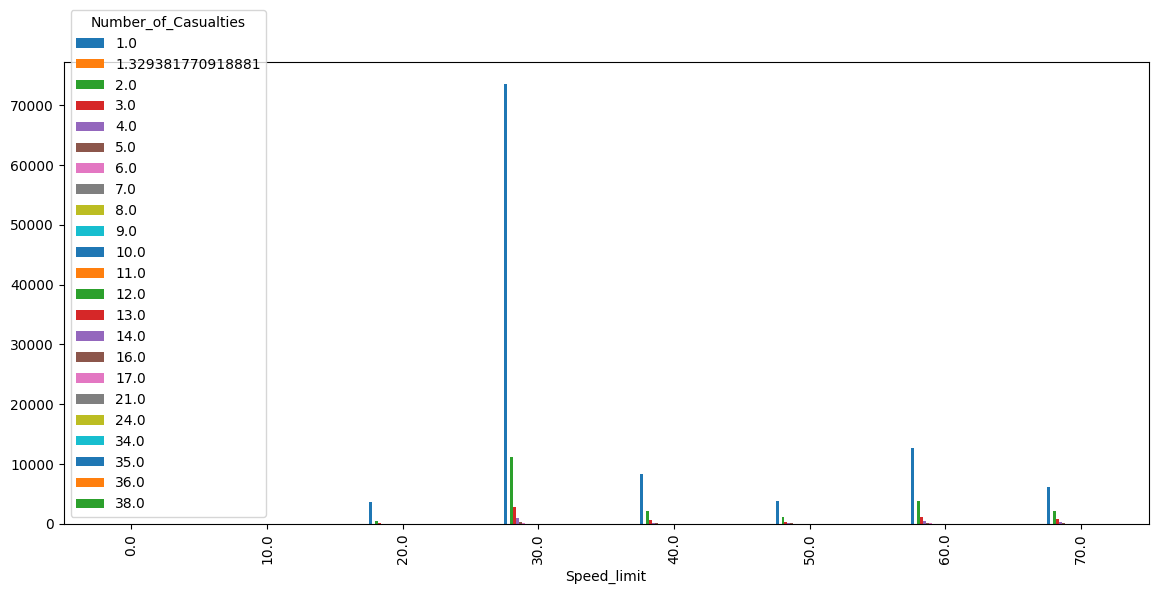

In [ ]:
pd.crosstab(data_final.Speed_limit,data_final.Number_of_Casualties).plot(kind='bar',figsize=(14,6))
plt.show()

In [ ]:
  mean_value=data_final['Number_of_Casualties'].median()
data_final['Number_of_Casualties'].fillna(value=mean_value, inplace=True)

Number_of_Casualties']]
y1=data_final['Speed_limit. vs Accident Severity

In [ ]:
mean_value=data_final['Speed_limit'].median()
data_final['Speed_limit'].fillna(value=mean_value, inplace=True)
x1=data_final[['Number_of_Casualties']]
y1=data_final['Speed_limit']

In [ ]:
print(data_final['Speed_limit'])

0         30.0
1         30.0
2         30.0
3         30.0
4         30.0
          ... 
129664    30.0
131152    30.0
132218    30.0
134155    30.0
134207    30.0
Name: Speed_limit, Length: 138440, dtype: float64


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 134207
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Location_Easting_OSGR                        138440 non-null  float64 
 1   Location_Northing_OSGR                       138440 non-null  float64 
 2   Longitude                                    138440 non-null  float64 
 3   Latitude                                     138440 non-null  float64 
 4   Police_Force                                 138440 non-null  float64 
 5   Accident_Severity                            138440 non-null  float64 
 6   Number_of_Vehicles                           138440 non-null  float64 
 7   Number_of_Casualties                         138440 non-null  float64 
 8   Day_of_Week                                  138440 non-null  float64 
 9   Local_Authority_(District)                   138

In [ ]:
x1_train,x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

In [ ]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
rf.score(x1_train,y1_train)

0.643594885395778

In [ ]:
predict2=rf.predict(x1_test)
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(predict2,y1_test)

0.6439828393818675

In [ ]:
mean_value=data_final['Speed_limit'].median()
data_final['Speed_limit'].fillna(value=mean_value, inplace=True)
mean_value=data_final['Road_Type'].median()
data_final['Road_Type'].fillna(value=mean_value, inplace=True)
x7=data_final[['Road_Type']]
y7=data_final['Speed_limit']

In [ ]:
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.33, random_state=42)
from sklearn.naive_bayes import BernoulliNB
be = BernoulliNB()

In [ ]:
be.fit(x7_train,y7_train)

BernoulliNB()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
be.score(x7_train,y7_train)

0.6435409793647713

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 134207
Data columns (total 32 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Location_Easting_OSGR                        138440 non-null  float64 
 1   Location_Northing_OSGR                       138440 non-null  float64 
 2   Longitude                                    138440 non-null  float64 
 3   Latitude                                     138440 non-null  float64 
 4   Police_Force                                 138440 non-null  float64 
 5   Accident_Severity                            138440 non-null  float64 
 6   Number_of_Vehicles                           138440 non-null  float64 
 7   Number_of_Casualties                         138440 non-null  float64 
 8   Day_of_Week                                  138440 non-null  float64 
 9   Local_Authority_(District)                   138

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold()

In [ ]:
data_final = data_final.drop(['Location_Easting_OSGR','Location_Northing_OSGR'],axis = 1)

In [ ]:
df_var_num = data_final.select_dtypes(include='number')

In [ ]:
transformed = vt.fit_transform(df_var_num)


In [ ]:
transformed

array([[ 0.        , 51.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        , 51.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       [ 0.        , 51.        ,  1.        , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-1.01840333, 51.95687322, 29.89955652, ...,  0.06175864,
         1.34244335,  1.19846603],
       [-1.01840333, 51.95687322, 29.89955652, ...,  0.06175864,
         1.34244335,  1.19846603],
       [-1.01840333, 51.95687322, 29.89955652, ...,  0.06175864,
         1.34244335,  1.19846603]])

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [ ]:
data_final.isnull().sum()


Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

In [ ]:
data_smote = data_final

In [ ]:
data_smote.dropna(inplace=True)

In [ ]:
data_smote.isnull().sum()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditi

In [ ]:
X = data_smote.drop('Accident_Severity', axis=1)
y = data_smote['Accident_Severity']
X = X.fillna(X.median())
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE on the target variable
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE: ", y_train_res.value_counts())


<ipython-input-67-86196c4afc63>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  X = X.fillna(X.median())


Class distribution after SMOTE:  3.0    82856
2.0    82856
Name: Accident_Severity, dtype: int64


In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 134207
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Longitude                                    138440 non-null  float64 
 1   Latitude                                     138440 non-null  float64 
 2   Police_Force                                 138440 non-null  float64 
 3   Accident_Severity                            138440 non-null  float64 
 4   Number_of_Vehicles                           138440 non-null  float64 
 5   Number_of_Casualties                         138440 non-null  float64 
 6   Day_of_Week                                  138440 non-null  float64 
 7   Local_Authority_(District)                   138440 non-null  float64 
 8   1st_Road_Class                               138440 non-null  float64 
 9   1st_Road_Number                              138

In [ ]:
X.isnull().sum()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control                               0
2nd_Road_Class                                 0
2nd_Road_Number                                0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_a

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE on the target variable
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [ ]:
clf_1 = LogisticRegression(solver='saga',max_iter=2500).fit(X_train_res, y_train_res)

ValueError: ignored

In [ ]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138440 entries, 0 to 134207
Data columns (total 30 columns):
 #   Column                                       Non-Null Count   Dtype   
---  ------                                       --------------   -----   
 0   Longitude                                    138440 non-null  float64 
 1   Latitude                                     138440 non-null  float64 
 2   Police_Force                                 138440 non-null  float64 
 3   Accident_Severity                            138440 non-null  float64 
 4   Number_of_Vehicles                           138440 non-null  float64 
 5   Number_of_Casualties                         138440 non-null  float64 
 6   Day_of_Week                                  138440 non-null  float64 
 7   Local_Authority_(District)                   138440 non-null  float64 
 8   1st_Road_Class                               138440 non-null  float64 
 9   1st_Road_Number                              138

In [ ]:
prob_y_1 = clf_1.predict_proba(X_test)
prob_y_1 = [p[1] for p in prob_y_1]
 
print(roc_auc_score(y_test, prob_y_1))

NameError: ignored

In [ ]:
pred_y_1 = clf_1.predict(X_test)

NameError: ignored

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# X = data_final.drop('Accident_Severity', axis=1)
y = data_final['Accident_Severity']
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X)
y = min_max_scaler.fit_transform(data_final[['Accident_Severity']])
X = pd.DataFrame(data_final.drop('Accident_Severity', axis=1))
y = pd.DataFrame(data_final['Accident_Severity'])
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
selected_features = rfe.support_
selected_feature_names = X.columns[rfe.support_]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

In [ ]:
from imblearn.under_sampling import TomekLinks
X_train, X_test, y_train, y_test = train_test_split(df_X, dataset_Y, test_size=0.2, random_state=42)

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X_train, y_train)

In [ ]:
print(selected_feature_names)

Index(['Number_of_Vehicles', 'Number_of_Casualties', '1st_Road_Class',
       'Road_Type', 'Junction_Control', '2nd_Road_Class',
       'Road_Surface_Conditions', 'Special_Conditions_at_Site',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'],
      dtype='object')


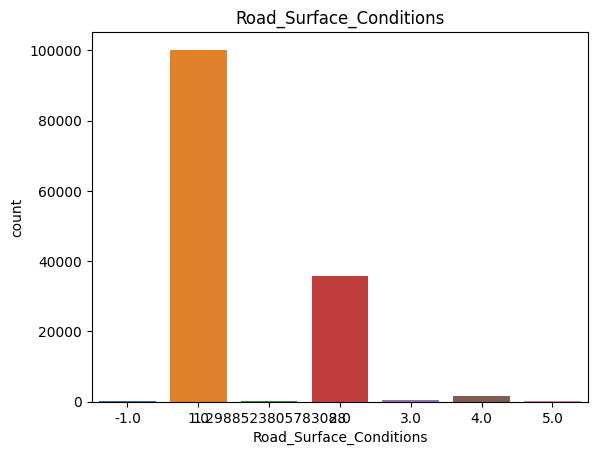

In [ ]:
import seaborn as sb
sb.countplot(x='Road_Surface_Conditions',data=data_final)
plt.title('Road_Surface_Conditions')
plt.show()
